## <center> Portuguese Bank Telemarketing Analytics

## Part 1. Project Overview

Nowadays, marketing expenditure in the banking industry is massive, meaning that it is essential for banks to optimize marketing strategies and improve effectiveness. Understanding customers’ need leads to more effective marketing plans, smarter product designs and greater customer satisfaction.

### Main Objective: increase the effectiveness of the bank's telemarketing campaign
This project will enable the bank to develop a more granular understanding of its customer base, predict customers' response to its telemarketing campaign and establish a target customer profile for future marketing plans. 

By analyzing customer features, such as demographics and transaction history, the bank will be able to predict customer saving behaviours and identify which type of customers is more likely to make term deposits. The bank can then focus its marketing efforts on those customers. This will not only allow the bank to secure deposits more effectively but also increase customer satisfaction by reducing undesirable advertisements for certain customers. 

## Part 2. Data Cleaning <a id="2"></a>

![clean](https://www.geeksforgeeks.org/wp-content/uploads/ml.png)

## Load the raw data

This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010. It is publicly available in the UCI Machine Learning Repository, which can be retrieved from http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from scipy.stats import zscore

In [5]:
df = pd.read_csv("bank_raw.csv", sep=";")

In [ ]:
df

In [ ]:
df.shape

There are 45,211 observations in this dataset. Each represents an existing customer that the bank reached via phone calls. 
* For each observation, the dataset records **16 input variables** that stand for both qualitative and quantitative attributes of the customer, such as age, job, housing and personal loan status, account balance, and the number of contacts. 
* There is **a single binary output variable** that denotes “yes” or “no” revealing the outcomes of the phone calls.

In [ ]:
df['y'].value_counts()

In [ ]:
df['y'].value_counts(normalize=True)*100

Only 11% of the total customers have subscribed to the term deposit plan

In [ ]:
df.info()

### Cleaning the dataset

In [ ]:
df['poutcome'].value_counts(normalize=True)

#### Dropping the poutcome column since 81% of the values are unknown

In [ ]:
df.drop(columns=['poutcome'], inplace=True)

In [ ]:
df['job'].value_counts()

In [ ]:
df['education'].value_counts()

#### Fill 'unknown' in the job and education column to 'other'

In [ ]:
df[['job','education']] = df[['job','education']].replace({'unknown':'other'})

In [ ]:
df['education'].value_counts()

In [15]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
other             288
Name: job, dtype: int64

#### Purifying the job column

In [16]:
df['job']=df['job'].replace({'admin.':'admin'})

In [17]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
other             288
Name: job, dtype: int64

#### Checking for duplicate rows and deleting them (0 in total)

In [24]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

<AxesSubplot:xlabel='balance', ylabel='Density'>

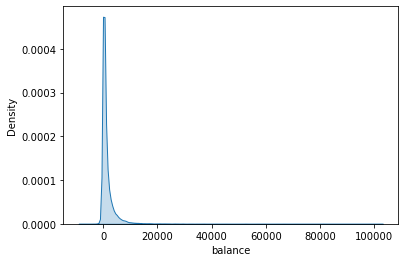

In [18]:
# Create a density plot
sns.kdeplot(df['balance'], shade=True)

In [19]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<AxesSubplot:>

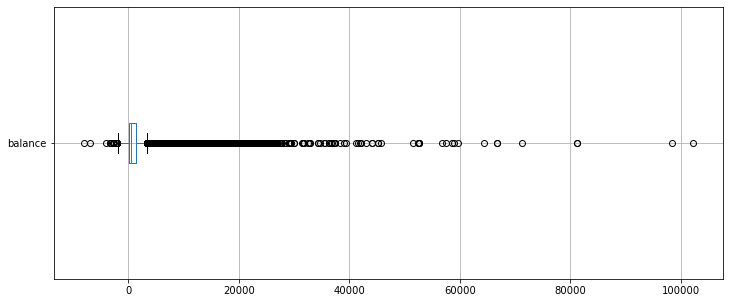

In [20]:
df.boxplot('balance', vert=0, figsize='12,5')

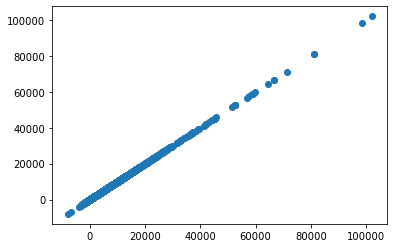

In [21]:
plt.scatter(y=df['balance'], x=df['balance'])

#### Checking pdays column

In [25]:
df['pdays'].value_counts(normalize=True).head()*100

-1      81.736745
 182     0.369379
 92      0.325142
 91      0.278693
 183     0.278693
Name: pdays, dtype: float64

In [26]:
df.loc[(df['pdays']==-1) & (df['y']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
83,59,admin,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
86,56,admin,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,yes
168,54,admin,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,34,admin,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,yes


In [16]:
#Percentage of -1 values
3384/5289*100

63.98184912081679

Insights:<br>
    As we can see that huge percentage of data (80%) is '-1' meaning the client was not previously contacted. In the cases where the client was previously contacted, which is a very small fraction of the entire data, 'No' and 'Yes' is almost same. So we can drop this column, as it isnt contributing any value for the prediction.

#### Dropping the pdays column

In [28]:
df.drop(columns=['pdays'],inplace=True)

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,may,92,1,0,no
4,33,other,single,other,no,1,no,no,unknown,5,may,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,no


#### Changing 'month' column from string to numbers for easier analysis

In [30]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [31]:
df['month']=df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [32]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,0,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,5,92,1,0,no
4,33,other,single,other,no,1,no,no,unknown,5,5,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,11,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,11,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,11,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,11,508,4,0,no


#### Since the customers are contacted every day, the feature does not add value to the analysis. Hence we drop day column

In [24]:
df['day'].nunique()

31

In [33]:
df.drop(columns=['day'],inplace=True)

In [34]:
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,0,no
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,92,1,0,no
4,33,other,single,other,no,1,no,no,unknown,5,198,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,11,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,11,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,11,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,11,508,4,0,no


#### Checking contact column

In [35]:
df['contact'].value_counts(normalize=True)

cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64

In [36]:
df.loc[(df['contact']=='cellular') & (df['y']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,y
12662,28,blue-collar,single,secondary,no,-127,yes,no,cellular,7,1044,3,0,yes
12684,49,blue-collar,married,primary,no,-157,yes,no,cellular,7,491,3,0,yes
12685,55,blue-collar,married,secondary,no,49,yes,no,cellular,7,494,4,0,yes
12686,51,technician,married,secondary,no,216,no,no,cellular,7,615,2,0,yes
12718,39,technician,single,secondary,no,506,yes,no,cellular,7,718,2,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,11,300,1,8,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,11,386,2,0,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,11,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,11,456,2,0,yes


In [26]:
df.loc[(df['contact']=='unknown') & (df['y']=='yes')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44489,31,blue-collar,married,secondary,no,0,yes,no,unknown,10,aug,97,1,782,1,other,yes
44550,29,self-employed,single,tertiary,no,814,no,no,unknown,13,aug,461,1,-1,0,unknown,yes
44615,34,admin.,single,tertiary,no,625,no,yes,unknown,31,aug,34,1,-1,0,unknown,yes
44687,52,management,married,unknown,no,1708,no,no,unknown,6,sep,310,1,75,4,failure,yes


In [28]:
((4369+530)/5289)*100

92.62620533182076

Insights:<br>
    As we can see that high percenatge of data(64%) is 'cellular' meaning the client was contacted on their cellular compared to 'telephone' which is barely 6%. While the rest remain unknown. The total percenatge of clients who subscrbied when the calling medium is either cellular or unknown is almost 93%. Hence, this does not stand up to be a deciding factor for the predictive analysis. So we can drop this column, as it isnt contributing any value for the prediction.

#### Dropping the contact column

In [30]:
df.drop(columns=['contact'],inplace=True)

#### Changing the column name from 'y' to a meaningful name 'deposit'

In [41]:
df.rename(columns={'y':'deposit'}, inplace=True)

#### Checking other columns

In [38]:
df['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

In [39]:
df['education'].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
other        0.041074
Name: education, dtype: float64

In [40]:
df['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

#### Defining a function to convert the categorical column to a new binary numerial column

In [42]:
def convert(df, new_column, old_column):
    df[new_column] = df[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return df[new_column].value_counts()

#### Getting the binary deposit column

In [43]:
convert(df,'binary_deposit','deposit')

0    39922
1     5289
Name: binary_deposit, dtype: int64

In [44]:
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,previous,deposit,binary_deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,261,1,0,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,151,1,0,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,76,1,0,no,0
3,47,blue-collar,married,other,no,1506,yes,no,unknown,5,92,1,0,no,0
4,33,other,single,other,no,1,no,no,unknown,5,198,1,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,11,977,3,0,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,11,456,2,0,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,11,1127,5,3,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,11,508,4,0,no,0


In [47]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration'>

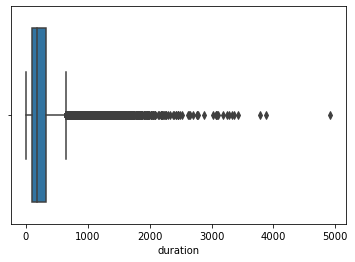

In [48]:
sns.boxplot(df['duration'])

#### Changing the unit of 'duration' from seconds to minutes

In [49]:
df['duration'] = df['duration'].apply(lambda n: n/60).round(2)

In [50]:
df['duration'].describe()

count    45211.000000
mean         4.302729
std          4.292132
min          0.000000
25%          1.720000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration'>

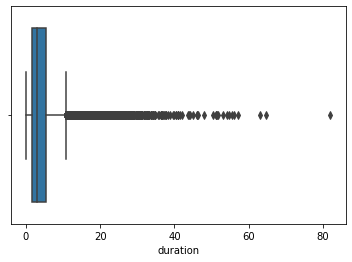

In [51]:
sns.boxplot(df['duration'])

#### Dropping rows whose 'duration' < 30s

In [52]:
condition = (df['duration']<30/60)

In [53]:
df[condition]

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit
42,60,blue-collar,married,other,no,104,yes,no,5,0.37,1,0,no,0
57,47,blue-collar,married,other,no,306,yes,no,5,0.22,1,0,no,0
82,42,technician,single,secondary,no,690,yes,no,5,0.33,1,0,no,0
107,34,admin,married,secondary,no,61,no,yes,5,0.35,1,0,no,0
177,34,technician,married,secondary,no,51,yes,no,5,0.32,2,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45027,39,services,single,secondary,no,471,no,no,10,0.08,1,0,no,0
45061,30,self-employed,single,secondary,no,1031,no,no,10,0.12,1,0,no,0
45062,58,retired,married,primary,no,742,no,no,10,0.08,1,0,no,0
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,10,0.28,1,0,no,0


In [54]:
df[condition & df['binary_deposit']==1]

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit
24103,58,management,divorced,tertiary,no,372,no,yes,10,0.18,1,0,yes,1
27715,23,unemployed,single,primary,no,1003,no,no,11,0.13,1,0,yes,1
44061,53,services,divorced,secondary,no,36,yes,yes,7,0.42,1,1,yes,1
44123,27,technician,single,secondary,no,337,no,no,7,0.38,1,0,yes,1


In [56]:
df.drop(df[condition].index, inplace=True)

In [57]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1
45208,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43264 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43264 non-null  int64  
 1   job             43264 non-null  object 
 2   marital         43264 non-null  object 
 3   education       43264 non-null  object 
 4   default         43264 non-null  object 
 5   balance         43264 non-null  int64  
 6   housing         43264 non-null  object 
 7   loan            43264 non-null  object 
 8   month           43264 non-null  int64  
 9   duration        43264 non-null  float64
 10  campaign        43264 non-null  int64  
 11  previous        43264 non-null  int64  
 12  deposit         43264 non-null  object 
 13  binary_deposit  43264 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 5.0+ MB


#### Getting the binary default, housing and loan columns

In [59]:
convert(df,'binary_default','default')
convert(df,'binary_housing','housing')
convert(df,'binary_loan','loan')

0    36302
1     6962
Name: binary_loan, dtype: int64

In [60]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0


#### Checking for outliers in balance column

In [63]:
df['balance_outliers'] = df['balance']

In [64]:
df['balance_outliers']= zscore(df['balance_outliers'])

In [65]:
condition1 = (df['balance_outliers']>3) | (df['balance_outliers']<-3 )

In [67]:
df1=df[condition1]

In [68]:
df1['deposit'].value_counts()

no     594
yes    118
Name: deposit, dtype: int64

<AxesSubplot:xlabel='balance'>

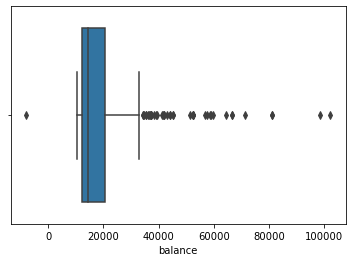

In [71]:
sns.boxplot(df1['balance'])

In [74]:
df.drop(columns="balance_outliers", inplace=True)

In [75]:
df1.to_csv("Balance_Outliers.csv")

In [77]:
df.to_csv("Bank_with_Balance_Outliers.csv",index=False)

In [78]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0
45207,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0
45208,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0
45209,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0


## Part 3. Exploratory Data Analysis <a id="3"></a>

To obtain a better understanding of the dataset, the distribution of key variables and the relationships among them were plotted.

<img src='https://static.wixstatic.com/media/e42cce_756b090fe40548eda9148fd5599980bb~mv2.gif' width='450'>

In [61]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'deposit',
       'binary_deposit', 'binary_default', 'binary_housing', 'binary_loan'],
      dtype='object')

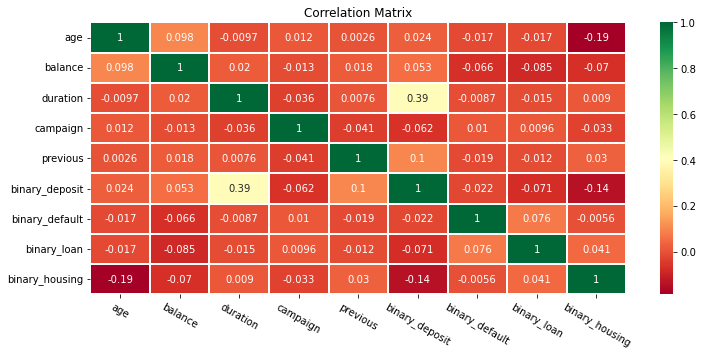

In [62]:
corr_data = df[['age','balance','duration','campaign','previous','binary_deposit',
                'binary_default','binary_loan','binary_housing']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [4]:
df = pd.read_csv("Bank_with_Balance_Outliers.csv")

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43259,51,technician,married,tertiary,no,825,no,no,11,16.28,3,0,yes,1,0,0,0
43260,71,retired,divorced,primary,no,1729,no,no,11,7.60,2,0,yes,1,0,0,0
43261,72,retired,married,secondary,no,5715,no,no,11,18.78,5,3,yes,1,0,0,0
43262,57,blue-collar,married,secondary,no,668,no,no,11,8.47,4,0,no,0,0,0,0


In [6]:
cat_vars=list()
num_vars=list()
for col in df.drop(columns='deposit'):
    if (df[col].dtype=='O'):
        cat_vars.append(col)
    else:
        num_vars.append(col)

In [7]:
print(cat_vars)

['job', 'marital', 'education', 'default', 'housing', 'loan']


In [8]:
print(num_vars)

['age', 'balance', 'month', 'duration', 'campaign', 'previous', 'binary_deposit', 'binary_default', 'binary_housing', 'binary_loan']


In [9]:
num_vars_df=df[num_vars]

In [10]:
cat_vars_df=df[cat_vars]

In [120]:
num_vars_df

,age,balance,month,duration,campaign,previous,binary_deposit,binary_default,binary_housing,binary_loan
0,58,2143,5,4.35,1,0,0,0,1,0
1,44,29,5,2.52,1,0,0,0,1,0
2,33,2,5,1.27,1,0,0,0,1,1
3,47,1506,5,1.53,1,0,0,0,1,0
4,33,1,5,3.30,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
43259,51,825,11,16.28,3,0,1,0,0,0
43260,71,1729,11,7.60,2,0,1,0,0,0
43261,72,5715,11,18.78,5,3,1,0,0,0
43262,57,668,11,8.47,4,0,0,0,0,0


In [121]:
cat_vars_df

,job,marital,education,default,housing,loan,balance_status
0,management,married,tertiary,no,yes,no,very high
1,technician,single,secondary,no,yes,no,low
2,entrepreneur,married,secondary,no,yes,yes,very low
3,blue-collar,married,other,no,yes,no,high
4,other,single,other,no,no,no,very low
...,...,...,...,...,...,...,...
43259,technician,married,tertiary,no,no,no,high
43260,retired,divorced,primary,no,no,no,high
43261,retired,married,secondary,no,no,no,very high
43262,blue-collar,married,secondary,no,no,no,medium


In [23]:
deposit_yes_df = df[df.deposit=='yes']

In [164]:
df.balance.quantile(np.arange(0.0,1.1,0.1))

0.0     -8019.0
0.1         0.0
0.2        23.0
0.3       132.0
0.4       274.0
0.5       452.0
0.6       705.8
0.7      1133.1
0.8      1875.0
0.9      3586.7
1.0    102127.0
Name: balance, dtype: float64

In [11]:
df["balance_status"] = None

In [12]:
df["balance_status"].loc[(df['balance']>=df.balance.quantile(0.0)) & 
                         (df['balance']<=df.balance.quantile(0.15))] = 'negative'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.15)) & 
                         (df['balance']<=df.balance.quantile(0.4))] = 'low'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.4)) & 
                         (df['balance']<=df.balance.quantile(0.6))] = 'medium'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.6)) & 
                         (df['balance']<=df.balance.quantile(0.8))] = 'high'

df["balance_status"].loc[(df['balance']>df.balance.quantile(0.8)) & 
                         (df['balance']<=df.balance.quantile(1.0))] = 'very high'

In [168]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='balance_status', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

In [169]:
round(percentages,2)

deposit,no,yes
balance_status,,
high,86.03,13.97
low,89.94,10.06
medium,87.78,12.22
negative,92.78,7.22
very high,82.95,17.05


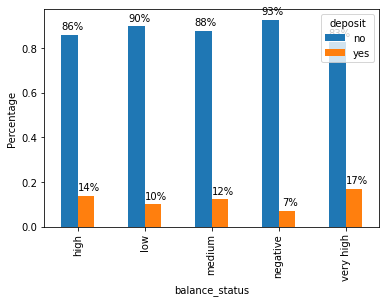

In [170]:
# Create pivot table of counts
pivot_table = pd.pivot_table(df, index='balance_status', columns='deposit', aggfunc='size')

# Calculate percentages
pivot_table = pivot_table.apply(lambda x: x / x.sum(), axis=1)

# Create stacked bar chart
ax = pivot_table.plot(kind='bar')
plt.ylabel('Percentage')

# Loop through the bars and add percentage labels
for i, bar in enumerate(ax.containers):
    for j, subbar in enumerate(bar):
        height = subbar.get_height()
        ax.annotate('{:.0%}'.format(height), xy=((subbar.get_x() + subbar.get_width() / 2)+0.04, height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

plt.show()

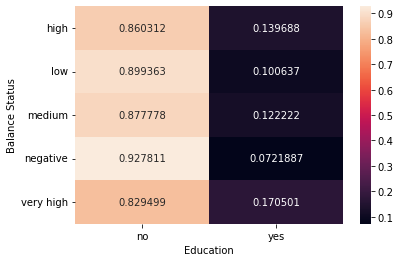

In [171]:
# Create heatmap
sns.heatmap(pivot_table, annot=True, fmt='g')
plt.xlabel('Education')
plt.ylabel('Balance Status')
plt.show()

In [172]:
df.balance.quantile(np.arange(0.0,1.05,0.05))

0.00     -8019.00
0.05      -172.00
0.10         0.00
0.15         0.00
0.20        23.00
0.25        74.00
0.30       132.00
0.35       200.00
0.40       274.00
0.45       355.00
0.50       452.00
0.55       567.00
0.60       705.80
0.65       891.00
0.70      1133.10
0.75      1437.00
0.80      1875.00
0.85      2551.00
0.90      3586.70
0.95      5779.85
1.00    102127.00
Name: balance, dtype: float64

***Insights: target clients with high or very high balance***

To identify the trend more easily, clients are categorized into five groups based on the distribution of percentile of the balance in the dataset:

* Negative Balance: clients with a negative balance (0-15% percentile)
* Low Balance: clients with a balance between 0 and 274 euros (15-40% percentile)
* Medium Balance: clients with a balance between 274 and 705 euros. (40-60% percentile)
* High Balance: clients with a balance between 705 and 1875 euros. (60-80% percentile)
* Very High Balance: clients with a balance greater than 1875 euros. (80-100% percentile)

Unsurprisingly, this bar chart indicates a positive correlation between clients’ balance levels and subscription rate. Clients with negative balances, low and medium balances only returned a subscription rate of 7%, 10% and 12% while clients with high or very high balances had significantly higher subscription rates, nearly 14 and 17% respectively. Hence bank must look for targeting clients' with higher balances particularly when they have a balance of 1875 or more.

However, it is worth noting that in this campaign, more than 50% of clients contacted only have a low balance level according to the usual. Therefore, In the future, the bank should shift its marketing focus to high-balance customers to secure more term deposits. 

## Visualize the relation of 'age' and 'balance'

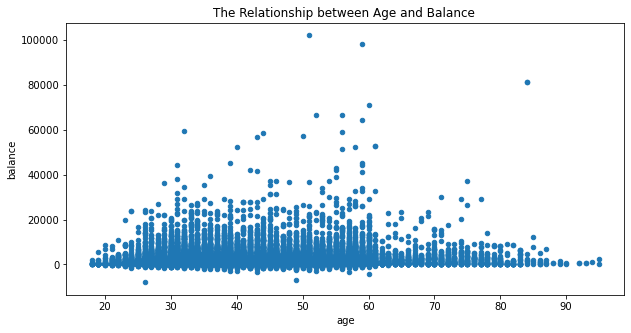

In [14]:
df.plot.scatter('age','balance',figsize = (10,5))
plt.title('The Relationship between Age and Balance ')
plt.show()

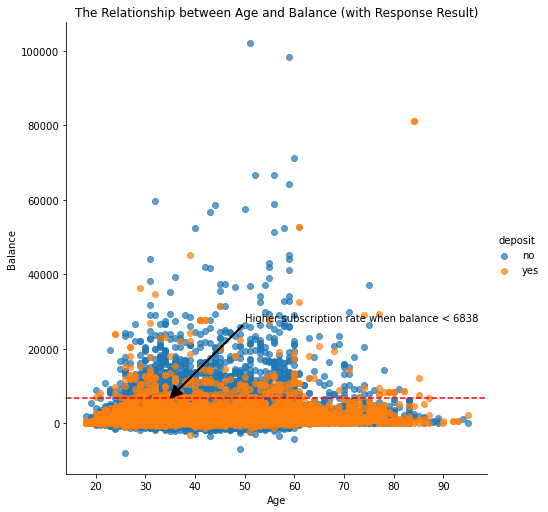

In [90]:
dur_cam = sns.lmplot(x='age', y='balance',data = df,
                     hue = 'deposit',
                     fit_reg = False,
                     scatter_kws={'alpha':0.7}, height =7)

plt.ylabel('Balance')
plt.xlabel('Age')
plt.title('The Relationship between Age and Balance (with Response Result)')

# Calculate the threshold value
threshold = np.percentile(df[df['deposit']=='yes']['balance'], 95)

# Add vertical line to plot at the threshold value
dur_cam.ax.axhline(y=threshold, color='red', linestyle='--')

# Annotation
#plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when balance < 6838', xytext = (50,threshold*4),
             arrowprops=dict(color = 'k', width=1), xy= (35,threshold))
plt.show()

<b> Inference: </b>In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, “yes” clients and “no” clients are forming similar clusters. However, we notice that 95% of the clients who subscribed have a balance less than 6840 approximately. Only a 5% of the clients who have a balance equal or more than 6840 have subscribed to the term deposit plan.

This suggests that the bank should focus less on promoting the term deposit plan to people with balance exceeding the range of 6800 approximately.

In [173]:
df.describe()

,age,balance,month,duration,campaign,previous,binary_deposit,binary_default,binary_housing,binary_loan
count,43264.000000,43264.000000,43264.000000,43264.000000,43264.000000,43264.000000,43264.000000,43264.000000,43264.000000,43264.000000
mean,40.988096,1368.857364,6.150656,4.483612,2.580529,0.566152,0.122157,0.017775,0.553925,0.160919
std,10.672103,3059.298344,2.416524,4.300128,2.646094,2.250769,0.327471,0.132133,0.497089,0.367460
min,18.000000,-8019.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,74.000000,5.000000,1.870000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,452.000000,6.000000,3.150000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,1437.000000,8.000000,5.470000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,102127.000000,12.000000,81.970000,63.000000,275.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df["age_group"]=None

In [14]:
df["age_group"].loc[df['age']<30]=20
df["age_group"].loc[(df['age']>=30) & (df['age']<=39)]=30
df["age_group"].loc[(df['age']>=40) & (df['age']<=49)]=40
df["age_group"].loc[(df['age']>=50) & (df['age']<=59)]=50
df["age_group"].loc[(df['age']>=60) & (df['age']<=69)]=60
df["age_group"].loc[df['age']>=70]=70

In [15]:
df['age_group']=df['age_group'].astype(int)

In [184]:
df["age_group"].describe()

count     43264
unique        6
top          30
freq      17254
Name: age_group, dtype: int64

In [187]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='age_group', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

In [188]:
percentages

deposit,no,yes
age_group,,
20,81.601431,18.398569
30,88.912716,11.087284
40,90.464657,9.535343
50,90.288974,9.711026
60,69.884488,30.115512
70,57.581227,42.418773


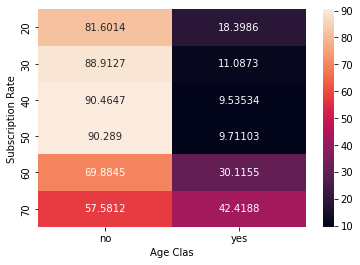

In [192]:
# Create heatmap
sns.heatmap(percentages, annot=True, fmt='g')
plt.xlabel('Age Clas')
plt.ylabel('Subscription Rate')
plt.show()

Text(0, 0.5, 'Percentage')

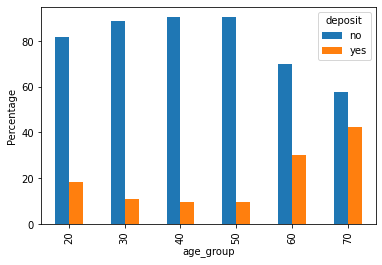

In [191]:
# Create stacked bar chart
percentages.plot(kind='bar')
plt.ylabel('Percentage')

**Insights: Target the youngest and the oldest instead of the middle-aged**

Green vertical bars indicate that clients with a age of 60 and 70+ have the highest subscription rate 30 and 42% respectively. About 18% of the subscriptions came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest clients. 

* It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as the least risky investment tool, are more preferable to the eldest. 

* The youngest may not have enough money or professional knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students.

However, red vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger and older clients in the future. 

In [ ]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='age_group', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

In [203]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_status'])['binary_deposit'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_status'])['deposit'].count())

age_balance1['deposit'] = age_balance2['deposit']
age_balance1['deposit_rate'] = age_balance1['binary_deposit']/ (age_balance1['deposit'])
age_balance1 = age_balance1.drop(['binary_deposit','deposit'],axis =1)

age_balance1 = age_balance1.unstack()

In [204]:
age_balance1

deposit_rate                                        
balance_status         high       low    medium  negative very high
age_group                                                          
20                 0.214435  0.155049  0.206278  0.106501  0.250000
30                 0.129246  0.099291  0.109953  0.061484  0.153946
40                 0.119214  0.070679  0.086600  0.067214  0.131309
50                 0.094083  0.067134  0.095783  0.065882  0.146526
60                 0.301527  0.285047  0.331658  0.165414  0.339109
70                 0.484615  0.363636  0.406977  0.318182  0.430962

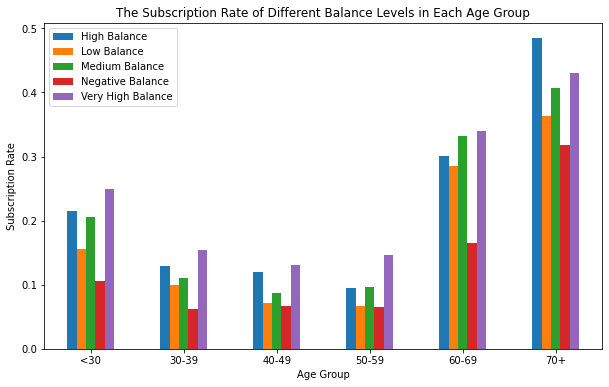

In [209]:
age_bal = age_balance1.plot(kind='bar',figsize = (10,6))

# Set x ticks
plt.xticks(np.arange(6),('<30', '30-39', '40-49', '50-59', '60-69', '70+'),rotation = 'horizontal')

# Set legend
plt.legend(['High Balance', 'Low Balance', 'Medium Balance', 'Negative Balance', 'Very High Balance'],loc = 'best',ncol = 1)

plt.ylabel('Subscription Rate')
plt.xlabel('Age Group')
plt.title('The Subscription Rate of Different Balance Levels in Each Age Group')
plt.show()

**Insights: target older clients with high balance levels**

While age represents a person’s life stage and balance represents a person’s financial condition, jointly evaluating the impact of these two factors enables us to investigate if there is a common trend across all ages, and to identify which combination of client features indicates the highest likelihood of subscription. 

In order to investigate the combined effect of age and balance on a client’s decision, we performed a two-layer grouping, segmenting customers according to their balance levels within each age group.

* The graph tells the same story regarding the subscription rate for different age groups: **the willingness to subscribe is exceptionally high for people aged above 60 and younger people aged below 30** also have a distinguishable higher subscription rate than those of other age groups. 


* Furthermore, **the effect of balance levels on subscription decision is applicable to each individual age group**: every age group shares a common trend that the percentage of subscription increases with balance. 

In sum, the bank should **prioritize its telemarketing to clients who are above 60 years old and have positive balances**, because they have the highest acceptance rate of about 35%. The next group the bank should focus on is **young clients with positive balances**, who showed high subscription rates between 15% and 20%.

## Visualize the subscription rate by job

In [210]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='job', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

# Print percentages
percentages

deposit,no,yes
job,,
admin,87.316583,12.683417
blue-collar,92.310199,7.689801
entrepreneur,91.368421,8.631579
housemaid,90.754877,9.245123
management,85.690699,14.309301
other,87.545788,12.454212
retired,76.725304,23.274696
self-employed,87.777778,12.222222
services,90.725806,9.274194


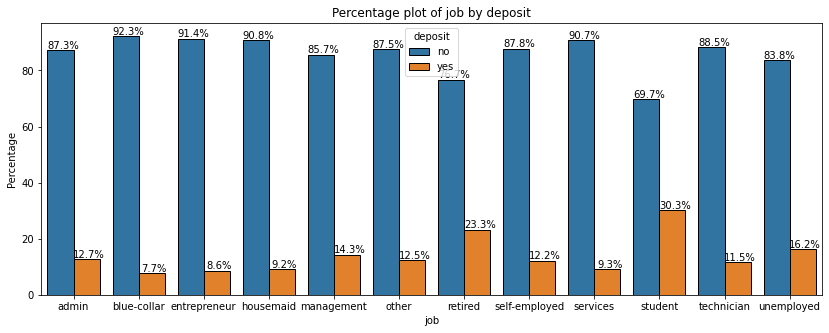

In [66]:
plt.figure(figsize=[14,5])
job_count = df.groupby(['job', 'deposit']).size().reset_index(name='count')
job_count['percent'] = job_count.groupby(['job'])['count'].apply(lambda x: 100*x/np.sum(x))
ax = sns.barplot(x='job', y='percent', hue='deposit', data=job_count, edgecolor="black")
plt.title("Percentage plot of job by deposit")
ax.set_ylabel('Percentage')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), ((p.get_x()+p.get_width()/2.)+0.04, p.get_height()+0.5), ha='center')
plt.show()

**Insights: target students and retired clients**

As noted from the bar chart, students and retired clients account for more than 50% of subscription, which is consistent with the previous finding of higher subscription rates among the younger and older. 

## Visualize the subscription and contact rate by month

In [217]:
# Create pivot table
pivot_table = pd.pivot_table(df, index='month', columns='deposit', aggfunc='size')

# Calculate percentages
percentages = pivot_table.apply(lambda x: x/x.sum()*100, axis=1)

# Print percentages
percentages

deposit,no,yes
month,,
1,89.747292,10.252708
2,82.267793,17.732207
3,47.899160,52.100840
4,79.675942,20.324058
5,92.953455,7.046545
6,88.983051,11.016949
7,90.626875,9.373125
8,88.590381,11.409619
9,50.369004,49.630996


In [220]:
month = pd.DataFrame(df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = percentages['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)

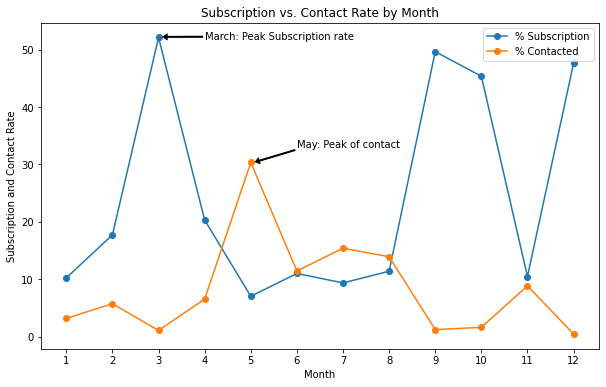

In [221]:
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                          figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')

ticks = np.arange(1,13,1)
plt.xticks(ticks)

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

plt.show()

**Insights: initiate the telemarketing campaign in fall or spring**

Besides customer characteristics, external factors may also have an impact on the subscription rate, such as seasons and the time of calling. So the month of contact is also analyzed here.  

This line chart displays the bank’s contact rate in each month as well as clients’ response rate in each month. One way to evaluate the effectiveness of the bank's marketing plan is to see whether these two lines have a similar trend over the same time horizon.
* The bank **contacted most clients between May and August**. The highest contact rate is around 30%, which happened in May, while the contact rate is closer to 0 in March, September, October, and December. 


* However, the subscription rate showed a different trend. **The highest subscription rate occurred in March**, which is over 50%, and all subscription rates in **September, October, and December** are over 40%. 

Clearly, **these two lines move in different directions which strongly indicates the inappropriate timing of the bank’s marketing campaign**. To improve the marketing campaign, the bank should consider initiating the telemarketing campaign in fall and spring when the subscription rate tends to be higher.

Nevertheless, the bank should be cautious when analyzing external factors. More data from previous marketing campaign should be collected and analyzed to make sure that this seasonal effect is constant over time and applicable to the future. 


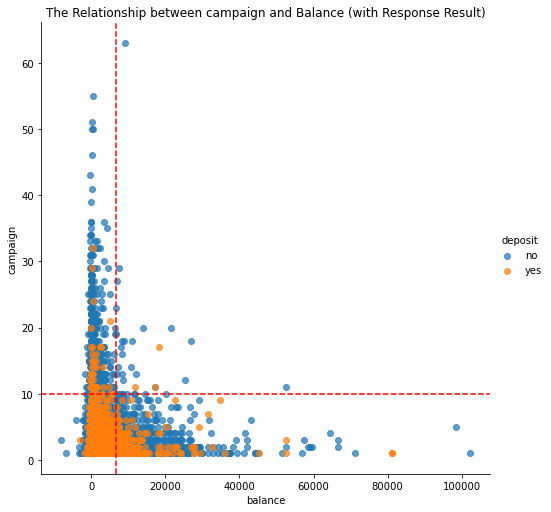

In [38]:
dur_cam = sns.lmplot(x='balance', y='campaign',data = df,
                     hue = 'deposit',
                     fit_reg = False,
                     scatter_kws={'alpha':0.7}, height =7)

plt.ylabel('campaign')
plt.xlabel('balance')
plt.title('The Relationship between campaign and Balance (with Response Result)')

# Calculate the threshold value
threshold = np.percentile(df[df['deposit']=='yes']['campaign'], 99)
threshold1 = np.percentile(df[df['deposit']=='yes']['balance'], 95)

# Add vertical line to plot at the threshold value
dur_cam.ax.axhline(y=threshold, color='red', linestyle='--')
dur_cam.ax.axvline(x=threshold1, color='red', linestyle='--')

In [39]:
threshold,threshold1

(10.0, 6838.200000000002)

In [28]:
deposit_yes_df.campaign.quantile(np.arange(0.1,1.1,0.1))

0.1     1.0
0.2     1.0
0.3     1.0
0.4     1.0
0.5     2.0
0.6     2.0
0.7     2.0
0.8     3.0
0.9     4.0
1.0    32.0
Name: campaign, dtype: float64

In [27]:
deposit_yes_df.campaign.quantile(np.arange(0.9,1.01,0.01))

0.90     4.0
0.91     4.0
0.92     4.0
0.93     5.0
0.94     5.0
0.95     5.0
0.96     6.0
0.97     7.0
0.98     8.0
0.99    10.0
1.00    32.0
Name: campaign, dtype: float64

<b> Inference: </b>In this scatter plot, clients subscribed to term deposits are denoted as "yes" while those did not are denoted as "no".

As we can see from the plot, 95% of the clients who subscribed i.e, the clients who have a balance less than 6840 approximately have subscribed (99% of them) when the no of calls done is less than or equal to 10 in the entire campaign. We also notice that as the balance increases customers are more likely to subscribe in less no of calls than comapred to negative and low balance clients.

This suggests that the bank should contact an approximate of 10 times at maximum to any customer to sell their term deposit product. Since above 10 very few customers are likely to subscribe. Also if bank wants to cut down on campaign costs, they shoul target the very high balance clients as they require less no of calls comparatively to subscribe.

In [41]:
cat_vars_df

,job,marital,education,default,housing,loan
0,management,married,tertiary,no,yes,no
1,technician,single,secondary,no,yes,no
2,entrepreneur,married,secondary,no,yes,yes
3,blue-collar,married,other,no,yes,no
4,other,single,other,no,no,no
...,...,...,...,...,...,...
43259,technician,married,tertiary,no,no,no
43260,retired,divorced,primary,no,no,no
43261,retired,married,secondary,no,no,no
43262,blue-collar,married,secondary,no,no,no


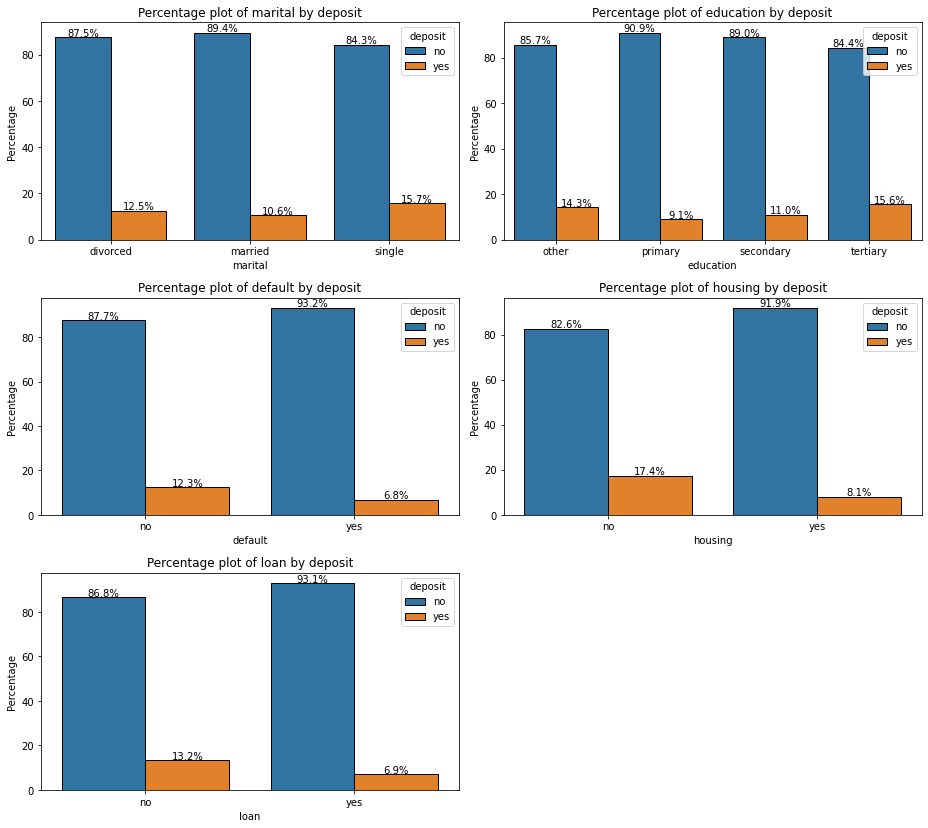

In [64]:
plt.figure(figsize=(13,15))
for i,cat_fea in enumerate(cat_vars_df.drop('job', axis=1)):
    plt.subplot(4,2,i+1)
    cat_count = df.groupby([cat_fea, 'deposit']).size().reset_index(name='count')
    cat_count['percent'] = cat_count.groupby([cat_fea])['count'].apply(lambda x: 100*x/np.sum(x))
    ax = sns.barplot(x=cat_fea, y='percent', hue='deposit', data=cat_count, edgecolor="black")
    plt.title("Percentage plot of {} by deposit".format(cat_fea))
    ax.set_ylabel('Percentage')
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()+0.5), ha='center')
plt.tight_layout()
plt.show()

Insights:<br>
1. Singles are more likely to subscribe to the term deposit as compared to married/divorced.<br>
2. Married and single people are more likely to deposit. <br>
3. People with tertiary education like professional course or university degree are more likely to deposit. <br>
4. Loan, housing, and default don't really contribute much to drawing a strong conclusions. But the bank must try to contact clients who have not taken any housing or any kind of loan and the ones who have defaulters. <br>

In [72]:
df.to_csv("Feature_Engineered_with_Outliers.csv", index=False)

# Machine Learning: Classification  <a id= '5'></a>

The main objective of this project is to identify the most responsive customers before the marketing campaign so that the bank will be able to efficiently reach out to them, saving time and marketing resources. To achieve this objective, classification algorithms will be employed. By analyzing customer statistics, a classification model will be built to classify all clients into two groups: "yes" to term deposits and "no" to term deposits.

## Load the cleaned dataset

In [3]:
df = pd.read_csv("Feature_Engineered_with_Outliers.csv")

In [4]:
# View the first 5 rows of cleaned data
df.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,deposit,binary_deposit,binary_default,binary_housing,binary_loan,balance_status,age_group
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,no,0,0,1,0,very high,50
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,no,0,0,1,0,low,40
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,no,0,0,1,1,low,30
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,no,0,0,1,0,high,40
4,33,other,single,other,no,1,no,no,5,3.30,1,0,no,0,0,0,0,low,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43264 entries, 0 to 43263
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43264 non-null  int64  
 1   job             43264 non-null  object 
 2   marital         43264 non-null  object 
 3   education       43264 non-null  object 
 4   default         43264 non-null  object 
 5   balance         43264 non-null  int64  
 6   housing         43264 non-null  object 
 7   loan            43264 non-null  object 
 8   month           43264 non-null  int64  
 9   duration        43264 non-null  float64
 10  campaign        43264 non-null  int64  
 11  previous        43264 non-null  int64  
 12  deposit         43264 non-null  object 
 13  binary_deposit  43264 non-null  int64  
 14  binary_default  43264 non-null  int64  
 15  binary_housing  43264 non-null  int64  
 16  binary_loan     43264 non-null  int64  
 17  balance_status  43264 non-null 

## Prepare Data for Classification

Only the most relevant customer information is considered, which includes job title, education, age, marital, balance, default record, housing record and loan record. Other information, such as ‘the number of contacts performed before this campaign’, is omitted because it is not directly related to customers themselves.

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'month', 'duration', 'campaign', 'previous', 'deposit',
       'binary_deposit', 'binary_default', 'binary_housing', 'binary_loan',
       'balance_status', 'age_group'],
      dtype='object')

In [7]:
df1 = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
          'month', 'duration', 'campaign', 'previous', 'balance_status', 'age_group']]

In [8]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,previous,balance_status,age_group
0,58,management,married,tertiary,no,2143,yes,no,5,4.35,1,0,very high,50
1,44,technician,single,secondary,no,29,yes,no,5,2.52,1,0,low,40
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1.27,1,0,low,30
3,47,blue-collar,married,other,no,1506,yes,no,5,1.53,1,0,high,40
4,33,other,single,other,no,1,no,no,5,3.30,1,0,low,30


### 5.2 Tranform categorical data into dummy variables

Since machine learning algorithms only take numerical values, all six categorical variables (job, marital, education, default, housing and loan) are transformed into dummy variables.

Dummy variables were used instead of continuous integers because these categorical variables are not ordinal. They simply represent different types rather than levels, so dummy variables are ideal to distinguish the effect of different categories. 

In [9]:
df1 = pd.get_dummies(df1)

In [10]:
df1.head()

,age,balance,month,duration,campaign,previous,age_group,job_admin,job_blue-collar,job_entrepreneur,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,balance_status_high,balance_status_low,balance_status_medium,balance_status_negative,balance_status_very high
0,58,2143,5,4.35,1,0,50,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1,44,29,5,2.52,1,0,40,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,33,2,5,1.27,1,0,30,0,0,1,...,0,0,1,0,1,0,1,0,0,0
3,47,1506,5,1.53,1,0,40,0,1,0,...,0,0,1,1,0,1,0,0,0,0
4,33,1,5,3.30,1,0,30,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [11]:
df1.columns

Index(['age', 'balance', 'month', 'duration', 'campaign', 'previous',
       'age_group', 'job_admin', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'balance_status_high', 'balance_status_low', 'balance_status_medium',
       'balance_status_negative', 'balance_status_very high'],
      dtype='object')

### Feature selection

In [12]:
X = df1
Y = df.binary_deposit

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

In [14]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=0)

In [46]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [47]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)    
    # train the model
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.884170 (0.002011)
KNN: 0.877178 (0.002775)
CART: 0.852706 (0.005866)
NB: 0.815348 (0.007106)


In [48]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [49]:
predictions = LR.predict(X_test)

In [50]:
# Accuracy Score 
print(accuracy_score(Y_test, predictions))

0.8821218074656189


In [51]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

[[7458  132]
 [ 888  175]]


In [52]:
cm=confusion_matrix(Y_test, predictions)

<AxesSubplot:>

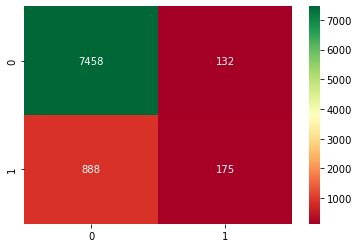

In [57]:
sns.heatmap(cm, annot=True, fmt='.0f',cmap="RdYlGn")

In [58]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      7590
           1       0.57      0.16      0.26      1063

    accuracy                           0.88      8653
   macro avg       0.73      0.57      0.60      8653
weighted avg       0.85      0.88      0.85      8653



In [59]:
f1_score(Y_test, predictions)

0.25547445255474455

Classification report shows the precision, recall, F1 and support scores for the LR classification model. 
* Precision of 0 (the client said no) represents that for all instances predicted as no subscription, the percentage of clients that actually said no is 88%. 
* Recall is the ability of a classifier to find all positive instances. Recall of 0 indicates that for all clients that actually said no, the model predicts 100% correctly that they would decline the offer. 

In general, the report shows that **LR model has great predictive power to identify the customers who would not subscribe to the term deposit**. However, because of the limited number of clients accepting the term deposit, there is a **need for stratified sampling or rebalancing to deal with this structural weakness** before we conclude whether LR algorithm can accurately classify those who are more likely to subscribe.

## Weighted Techniques of models

### LogisticRegression

In [62]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier with balanced class weights
lr = LogisticRegression(class_weight='balanced')

# Fit the model to the training data
lr.fit(X_train, Y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7590
           1       0.35      0.74      0.48      1063

    accuracy                           0.80      8653
   macro avg       0.65      0.77      0.68      8653
weighted avg       0.88      0.80      0.83      8653



In [63]:
print(confusion_matrix(Y_test, y_pred))

[[6152 1438]
 [ 280  783]]


In [64]:
print(f1_score(Y_test, y_pred))

0.476857490864799


### RandomForestClassifier

In [66]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
# Create a random forest classifier with balanced class weights
rf = RandomForestClassifier(class_weight='balanced')

# Fit the model to the training data
rf.fit(X_train, Y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7646
           1       0.61      0.26      0.37      1007

    accuracy                           0.89      8653
   macro avg       0.76      0.62      0.65      8653
weighted avg       0.87      0.89      0.88      8653



In [68]:
print(confusion_matrix(Y_test, y_pred))

[[7476  170]
 [ 744  263]]


In [69]:
print(f1_score(Y_test, y_pred))

0.3652777777777778


### GradientBoostingClassifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb = GradientBoostingClassifier()

# train the model with sample weights
gb.fit(X_train, Y_train)

# Predict on the test data
y_pred = gb.predict(X_test)

# Print the classification report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7646
           1       0.62      0.38      0.47      1007

    accuracy                           0.90      8653
   macro avg       0.77      0.68      0.71      8653
weighted avg       0.89      0.90      0.89      8653



In [76]:
print(confusion_matrix(Y_test, y_pred))

[[7412  234]
 [ 622  385]]


In [77]:
print(f1_score(Y_test, y_pred))

0.4735547355473554


### SVM

In [17]:
from sklearn.svm import SVC

# Train SVM model with class weighting
svm = SVC(class_weight='balanced')
svm.fit(X_train, Y_train)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[4964 2626]
 [ 548  515]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      7590
           1       0.16      0.48      0.25      1063

    accuracy                           0.63      8653
   macro avg       0.53      0.57      0.50      8653
weighted avg       0.81      0.63      0.69      8653



In [18]:
print(f1_score(Y_test, y_pred))

0.24500475737392963


### xgboost

In [81]:
# Import necessary libraries
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, Y_train)

# Predict on test data
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[7345  301]
 [ 593  414]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7646
           1       0.58      0.41      0.48      1007

    accuracy                           0.90      8653
   macro avg       0.75      0.69      0.71      8653
weighted avg       0.88      0.90      0.89      8653



# SMOTE Sampling

In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

### Logistic Regression

In [23]:
# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[6238 1352]
 [ 344  719]]
              precision    recall  f1-score   support

           0       0.95      0.82      0.88      7590
           1       0.35      0.68      0.46      1063

    accuracy                           0.80      8653
   macro avg       0.65      0.75      0.67      8653
weighted avg       0.87      0.80      0.83      8653



In [24]:
print(f1_score(Y_test, y_pred))

0.4588385449904276


### RandomForestClassifier

In [27]:
# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[7190  400]
 [ 574  489]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7590
           1       0.55      0.46      0.50      1063

    accuracy                           0.89      8653
   macro avg       0.74      0.70      0.72      8653
weighted avg       0.88      0.89      0.88      8653



In [28]:
print(f1_score(Y_test, y_pred))

0.5010245901639344


### SVM

In [29]:
# Train SVM model
svm = SVC()
svm.fit(X_train_res, y_train_res)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[4926 2664]
 [ 536  527]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.75      7590
           1       0.17      0.50      0.25      1063

    accuracy                           0.63      8653
   macro avg       0.53      0.57      0.50      8653
weighted avg       0.81      0.63      0.69      8653



In [30]:
print(f1_score(Y_test, y_pred))

0.2477668077103902


## Combining both UnderSampling & UnderSampling Techniques

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Set up the random undersampler and SMOTE oversampler
rus = RandomUnderSampler(sampling_strategy='majority')
smote = SMOTE()

# Perform the resampling on the training data
X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

In [32]:
X_resampled

,age,balance,month,duration,campaign,previous,age_group,job_admin,job_blue-collar,job_entrepreneur,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,balance_status_high,balance_status_low,balance_status_medium,balance_status_negative,balance_status_very high
0,36,774,5,2.33,1,0,30,0,0,0,...,0,0,1,1,0,1,0,0,0,0
1,49,1226,4,6.67,1,0,40,1,0,0,...,0,1,0,1,0,1,0,0,0,0
2,25,302,7,2.03,1,0,20,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,35,372,4,3.37,2,1,30,0,0,0,...,0,0,1,1,0,0,0,1,0,0
4,36,2813,8,1.47,3,0,30,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8439,28,5474,7,8.10,5,0,20,0,0,0,...,0,1,0,1,0,0,0,0,0,1
8440,43,0,10,7.73,1,2,40,0,0,0,...,0,1,0,1,0,0,0,0,1,0
8441,57,854,8,11.67,4,1,50,0,0,0,...,0,1,0,1,0,1,0,0,0,0
8442,66,2149,5,2.25,2,11,60,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [33]:
y_resampled.value_counts()

0    4222
1    4222
Name: binary_deposit, dtype: int64

### Linear Regression

In [34]:
# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = lr.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[6030 1560]
 [ 264  799]]
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7590
           1       0.34      0.75      0.47      1063

    accuracy                           0.79      8653
   macro avg       0.65      0.77      0.67      8653
weighted avg       0.88      0.79      0.82      8653



In [35]:
print(f1_score(Y_test, y_pred))

0.46697837521917007


### RandomForestClassifier

In [36]:
rf = RandomForestClassifier()
rf.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = rf.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[6093 1497]
 [ 168  895]]
              precision    recall  f1-score   support

           0       0.97      0.80      0.88      7590
           1       0.37      0.84      0.52      1063

    accuracy                           0.81      8653
   macro avg       0.67      0.82      0.70      8653
weighted avg       0.90      0.81      0.84      8653



In [37]:
print(f1_score(Y_test, y_pred))

0.5180897250361794


### SVM

In [38]:
# Train SVM model
svm = SVC()
svm.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = svm.predict(X_test)

# Evaluate model performance
print(confusion_matrix(Y_test, y_pred))

[[4835 2755]
 [ 543  520]]


In [39]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      7590
           1       0.16      0.49      0.24      1063

    accuracy                           0.62      8653
   macro avg       0.53      0.56      0.49      8653
weighted avg       0.81      0.62      0.68      8653



In [40]:
print(f1_score(Y_test, y_pred))

0.23974181650530196


## Best Parameter with GridSearchCV

### Logistic Regression

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [57]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [58]:
log = LogisticRegression()
log.fit(X_train,Y_train)
y_pred = log.predict(X_test)
print('Accuracy Score : %f' % (accuracy_score(y_pred, Y_test)))
parameters = {'C':[0.001, 0.1, 1, 10, 100]}
log_gsmodel = GridSearchCV(estimator=log, param_grid = parameters)
log_gsmodel_result = log_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (log_gsmodel_result.best_score_, log_gsmodel_result.best_params_))
print('mean_test_score : %s' % (log_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (log_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(log_gsmodel_result.cv_results_['params']))

Accuracy Score : 0.890211
Best: 0.883216 using {'C': 1}
mean_test_score : [0.88220507 0.88318733 0.88321622 0.88318733 0.88318733]
std_test_Score : [0.00086086 0.0018303  0.00181191 0.00175792 0.00175792]
params: [{'C': 0.001}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}]


### Decision Tree: Entropy Criterion

In [59]:
ds_tree_entropy = DecisionTreeClassifier(criterion='entropy',random_state=42)
ds_tree_entropy.fit(X_train,Y_train)
ds_tree_entropy_y_pred = ds_tree_entropy.predict(X_test)

In [60]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(Y_test,ds_tree_entropy_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(Y_test,ds_tree_entropy_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(Y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(Y_test,ds_tree_entropy_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(Y_test,ds_tree_entropy_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(Y_test,ds_tree_entropy_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8581994683924651
Balanced accuracy: 0.676173144254929
Precision score for "Yes" 0.4003623188405797
Precision score for "No" 0.9251556497549345
Recall score for "Yes" 0.43892750744786496
Recall score for "No" 0.9134187810619931


In [61]:
metrics.confusion_matrix(Y_test,ds_tree_entropy_y_pred)

array([[6984,  662],
       [ 565,  442]], dtype=int64)

In [62]:
entr_parameters = {'max_depth':[2,3,4,5,6,7,8,9,10]}
dt_entr_gsmodel = GridSearchCV(estimator=ds_tree_entropy, param_grid = entr_parameters)
dt_entr_gsmodel_result = dt_entr_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (dt_entr_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_entr_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_entr_gsmodel_result.cv_results_['std_test_score']))

Best: 0.887203 using {'max_depth': 7}
mean_test_score : [0.8777555  0.88168494 0.8839963  0.88419855 0.88711668 0.88720337
 0.88650996 0.88419867 0.88237827]
std_test_Score : [0.00251696 0.00161154 0.00258453 0.00240629 0.00380704 0.0023322
 0.00215739 0.00029362 0.00292906]


### Decision Tree: Gini Index Criterion

In [63]:
ds_tree_gini = DecisionTreeClassifier(criterion='gini',random_state=42)
ds_tree_gini.fit(X_train,Y_train)
ds_tree_gini_y_pred = ds_tree_gini.predict(X_test)
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(Y_test,ds_tree_gini_y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(Y_test,ds_tree_gini_y_pred))
print('Precision score for "Yes"' , metrics.precision_score(Y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(Y_test,ds_tree_gini_y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(Y_test,ds_tree_gini_y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(Y_test,ds_tree_gini_y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8578527678261875
Balanced accuracy: 0.6759769632452508
Precision score for "Yes" 0.3992773261065944
Precision score for "No" 0.9251258945136496
Recall score for "Yes" 0.43892750744786496
Recall score for "No" 0.9130264190426367


In [64]:
metrics.confusion_matrix(Y_test,ds_tree_gini_y_pred)

array([[6981,  665],
       [ 565,  442]], dtype=int64)

In [65]:
gini_parameters = {'max_depth':[2,3,4,5,6,7]}
dt_gini_gsmodel = GridSearchCV(estimator=ds_tree_gini, param_grid = gini_parameters)
dt_gini_gsmodel_result = dt_gini_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (dt_gini_gsmodel_result.best_score_, dt_entr_gsmodel_result.best_params_))
print('mean_test_score : %s' % (dt_gini_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (dt_gini_gsmodel_result.cv_results_['std_test_score']))

Best: 0.886539 using {'max_depth': 7}
mean_test_score : [0.88203168 0.88156936 0.88445861 0.88506538 0.88601893 0.88653897]
std_test_Score : [0.00133611 0.00188097 0.00185201 0.00145404 0.00256824 0.00157839]


### Naive Bayes Classifier

In [66]:
nb = GaussianNB()
nb_result = nb.fit(X_train,Y_train)
nb_y_pred = nb.predict(X_test)
print(accuracy_score(nb_y_pred,Y_test))

0.8119727262221195


### Stochastic Gradient Descent

In [67]:
sgd = SGDClassifier(loss='modified_huber',shuffle=True,random_state=42)
sgd.fit(X_train,Y_train)
sgd_y_pred = sgd.predict(X_test)
print(accuracy_score(sgd_y_pred,Y_test))

0.8919449901768173


In [68]:
print(metrics.confusion_matrix(sgd_y_pred,Y_test))

[[7473  762]
 [ 173  245]]


### K Neighbors Classifier

In [69]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
knn_y_pred = knn.predict(X_test)
print(accuracy_score(knn_y_pred,Y_test))

0.8838553102970068


In [70]:
knn_parameters = {'n_neighbors': range(10,15)}
knn_gsmodel = GridSearchCV(estimator=KNeighborsClassifier(), param_grid = knn_parameters)
knn_gsmodel_result = knn_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (knn_gsmodel_result.best_score_, knn_gsmodel_result.best_params_))
print('mean_test_score : %s' % (knn_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (knn_gsmodel_result.cv_results_['std_test_score']))

Best: 0.879345 using {'n_neighbors': 12}
mean_test_score : [0.87790013 0.87816014 0.87934474 0.87891134 0.87894021]
std_test_Score : [0.00200402 0.00126659 0.00181035 0.0013372  0.00138075]


### Random Forest Classifier

In [71]:
rfm_parameters = {'n_estimators': [80,90,100]}
rfm_gsmodel = GridSearchCV(estimator=RandomForestClassifier(oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10), param_grid = rfm_parameters)
rfm_gsmodel_result = rfm_gsmodel.fit(X_train,Y_train)
print("Best: %f using %s" % (rfm_gsmodel_result.best_score_, rfm_gsmodel_result.best_params_))
print('mean_test_score : %s' % (rfm_gsmodel_result.cv_results_['mean_test_score']))
print('std_test_Score : %s' % (rfm_gsmodel_result.cv_results_['std_test_score']))
print('params: %s' %(rfm_gsmodel_result.cv_results_['params']))

Best: 0.892231 using {'n_estimators': 90}
mean_test_score : [0.89173962 0.89223078 0.89199963]
std_test_Score : [0.00303126 0.00219938 0.00277166]
params: [{'n_estimators': 80}, {'n_estimators': 90}, {'n_estimators': 100}]


In [72]:
rfm = RandomForestClassifier(n_estimators=90,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)
rfm.fit(X_train,Y_train)
rfm_y_pred = rfm.predict(X_test)
print(accuracy_score(rfm_y_pred,Y_test))

0.8978388998035364


In [73]:
print(metrics.confusion_matrix(rfm_y_pred,Y_test))

[[7352  590]
 [ 294  417]]


In [74]:
print(metrics.classification_report(rfm_y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7942
           1       0.41      0.59      0.49       711

    accuracy                           0.90      8653
   macro avg       0.69      0.76      0.71      8653
weighted avg       0.92      0.90      0.91      8653



In [75]:
rfm_gsmodel_result.best_estimator_

RandomForestClassifier(max_features=None, min_samples_leaf=10, n_estimators=90,
                       n_jobs=1, oob_score=True, random_state=42)

### Vote Classifier

In [76]:
vote_classify = VotingClassifier(estimators=[
    ('log_be', log_gsmodel_result.best_estimator_), # Logistic Regression
    ('dt_entr_be', dt_entr_gsmodel_result.best_estimator_), #Decision tree entropy
    ('dt_gini_be', dt_gini_gsmodel_result.best_estimator_), #Decision tree Gini
    ('nb_be', nb), #Naive bayes
    ('sgd_be', sgd), #Stocastic Gradient Descent
    ('knn_be', knn_gsmodel_result.best_estimator_), #K-nearest Neighbors
    ('rfm_be', rfm_gsmodel_result.best_estimator_)], voting='soft') # Random Forest
vote_classify_model = vote_classify.fit(X_train, Y_train)
vote_classify_ypred = vote_classify_model.predict(X_test)
print(accuracy_score(vote_classify_ypred,Y_test))

0.8966832312492777


In [77]:
print(metrics.classification_report(vote_classify_ypred,Y_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8168
           1       0.30      0.62      0.40       485

    accuracy                           0.90      8653
   macro avg       0.64      0.76      0.67      8653
weighted avg       0.94      0.90      0.91      8653



In [78]:
f1_score_score(vote_classify_ypred,Y_test)

0.4008042895442359

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [80]:
fpr, tpr, _ =  roc_curve(Y_test,vote_classify.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr)

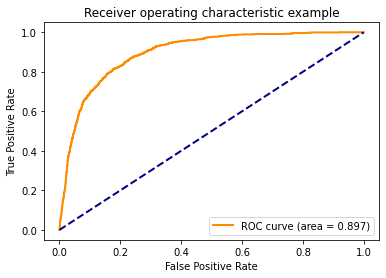

In [81]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

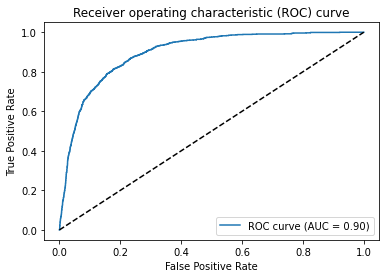

In [82]:
# Make predictions on test set
y_pred_proba = vote_classify.predict_proba(X_test)[:,1]  # predicted probabilities for positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

## Comapring the results

### Logistic Regression

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the resampling techniques
smote = SMOTE()
rus = RandomUnderSampler()

# Apply the resampling techniques to the training data
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, Y_train)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, Y_train)

# Train and evaluate logistic regression models on the resampled data
lr_smote = LogisticRegression()
lr_rus = LogisticRegression()

# Fit the logistic regression models on the SMOTE resampled data
lr_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = lr_smote.predict(X_test)
print('SMOTE resampling results:')
print(classification_report(Y_test, y_pred_smote))

# Fit the logistic regression models on the RandomUnderSampler resampled data
lr_rus.fit(X_resampled_rus, y_resampled_rus)
y_pred_rus = lr_rus.predict(X_test)
print('RandomUnderSampler resampling results:')
print(classification_report(Y_test, y_pred_rus))

SMOTE resampling results:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7646
           1       0.35      0.79      0.49      1007

    accuracy                           0.81      8653
   macro avg       0.66      0.80      0.68      8653
weighted avg       0.89      0.81      0.83      8653

RandomUnderSampler resampling results:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88      7646
           1       0.35      0.79      0.48      1007

    accuracy                           0.80      8653
   macro avg       0.66      0.80      0.68      8653
weighted avg       0.89      0.80      0.83      8653



In [42]:
print(confusion_matrix(Y_test, y_pred_smote))

[[6184 1462]
 [ 215  792]]


In [43]:
print(confusion_matrix(Y_test, y_pred_rus))

[[6169 1477]
 [ 216  791]]


In [45]:
print(f1_score(Y_test, y_pred_smote),(f1_score(Y_test, y_pred_rus)))

0.485740570377185 0.4830534351145038


### RandomForestClassifier

In [108]:
# Train and evaluate RandomForestClassifier on the resampled data
rf_smote = RandomForestClassifier(n_estimators=90,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)
rf_rus = RandomForestClassifier(n_estimators=90,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)

# Fit the RandomForestClassifier on the SMOTE resampled data
rf_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = rf_smote.predict(X_test)
print('SMOTE resampling results:')
print(classification_report(Y_test, y_pred_smote))

# Fit the lRandomForestClassifier on the RandomUnderSampler resampled data
rf_rus.fit(X_resampled_rus, y_resampled_rus)
y_pred_rus = rf_rus.predict(X_test)
print('RandomUnderSampler resampling results:')
print(classification_report(Y_test, y_pred_rus))

SMOTE resampling results:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7646
           1       0.53      0.63      0.57      1007

    accuracy                           0.89      8653
   macro avg       0.74      0.78      0.76      8653
weighted avg       0.90      0.89      0.90      8653

RandomUnderSampler resampling results:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      7646
           1       0.36      0.86      0.51      1007

    accuracy                           0.81      8653
   macro avg       0.67      0.83      0.70      8653
weighted avg       0.91      0.81      0.84      8653



In [109]:
print(confusion_matrix(Y_test, y_pred_smote))

[[7075  571]
 [ 372  635]]


In [110]:
print(f1_score(Y_test, y_pred_smote))

0.5738816086760054


In [111]:
print(confusion_matrix(Y_test, y_pred_rus))

[[6133 1513]
 [ 138  869]]


In [112]:
print(f1_score(Y_test, y_pred_rus))

0.5128356447329596


In [113]:
fpr, tpr, _ =  roc_curve(Y_test,rf_smote.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr)

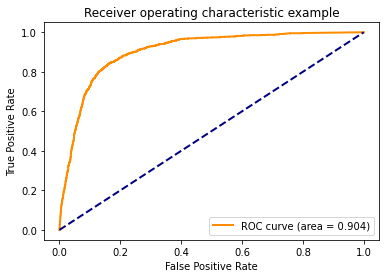

In [114]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label = 'ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

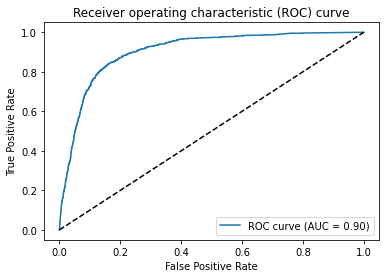

In [115]:
# Make predictions on test set
y_pred_proba = rf_smote.predict_proba(X_test)[:,1]  # predicted probabilities for positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = roc_auc_score(Y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### SVM

In [135]:
# Train and evaluate logistic regression models on the resampled data
svc_smote = SVC()
svc_rus = SVC()

# Fit the logistic regression models on the SMOTE resampled data
svc_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = svc_smote.predict(X_test)
print('SMOTE resampling results:')
print(classification_report(Y_test, y_pred_smote))

# Fit the logistic regression models on the RandomUnderSampler resampled data
svc_rus.fit(X_resampled_rus, y_resampled_rus)
y_pred_rus = svc_rus.predict(X_test)
print('RandomUnderSampler resampling results:')
print(classification_report(Y_test, y_pred_rus))

SMOTE resampling results:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89      7646
           1       0.36      0.77      0.50      1007

    accuracy                           0.82      8653
   macro avg       0.66      0.80      0.69      8653
weighted avg       0.89      0.82      0.84      8653

RandomUnderSampler resampling results:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      7646
           1       0.34      0.82      0.48      1007

    accuracy                           0.79      8653
   macro avg       0.65      0.80      0.68      8653
weighted avg       0.90      0.79      0.83      8653



In [136]:
print(confusion_matrix(Y_test, y_pred_smote))

[[6293 1353]
 [ 230  777]]


In [137]:
print(f1_score(Y_test, y_pred_smote))

0.4953777494421422


In [138]:
print(confusion_matrix(Y_test, y_pred_rus))

[[6050 1596]
 [ 186  821]]


In [139]:
print(f1_score(Y_test, y_pred_rus))

0.4795560747663552


## Adaptive Synthetic Sampling (ADASYN)

In [93]:
from imblearn.over_sampling import ADASYN

# X and y represent your data and labels, respectively
adasyn = ADASYN()
X_resampled, y_resampled = adasyn.fit_resample(X,Y)

In [96]:
rf = RandomForestClassifier(n_estimators=90,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)

In [97]:
# Fit the Random Forest Classifier model on the ADASYN resampled data
rf.fit(X_resampled, y_resampled)
y_pred = rf.predict(X_test)
print('ADASYN resampling results:')
print(classification_report(Y_test, y_pred))

ADASYN resampling results:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7646
           1       0.53      0.08      0.13      1007

    accuracy                           0.88      8653
   macro avg       0.71      0.53      0.54      8653
weighted avg       0.85      0.88      0.84      8653



In [98]:
f1_score(Y_test, y_pred)

0.13379669852302345

## Trying Different Sampling Process To increase accuracy

In [157]:
# Feature Importance
feature_importances = pd.DataFrame({'feature': df1.columns, 'importance': rf_smote.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)
print(feature_importances)

                     feature  importance
0                   duration    0.410013
1                   previous    0.182802
2                      month    0.180716
3                   campaign    0.042109
4                housing_yes    0.038204
5                 housing_no    0.036269
6                    balance    0.029091
7                        age    0.023977
8                  age_group    0.019867
9         education_tertiary    0.005656
10           marital_married    0.004384
11       education_secondary    0.002752
12            job_management    0.002706
13            marital_single    0.002177
14                   loan_no    0.001817
15       balance_status_high    0.001806
16            job_technician    0.001722
17           job_blue-collar    0.001566
18        balance_status_low    0.001530
19                 job_admin    0.001521
20                  loan_yes    0.001504
21     balance_status_medium    0.001441
22               job_student    0.001418
23         educa

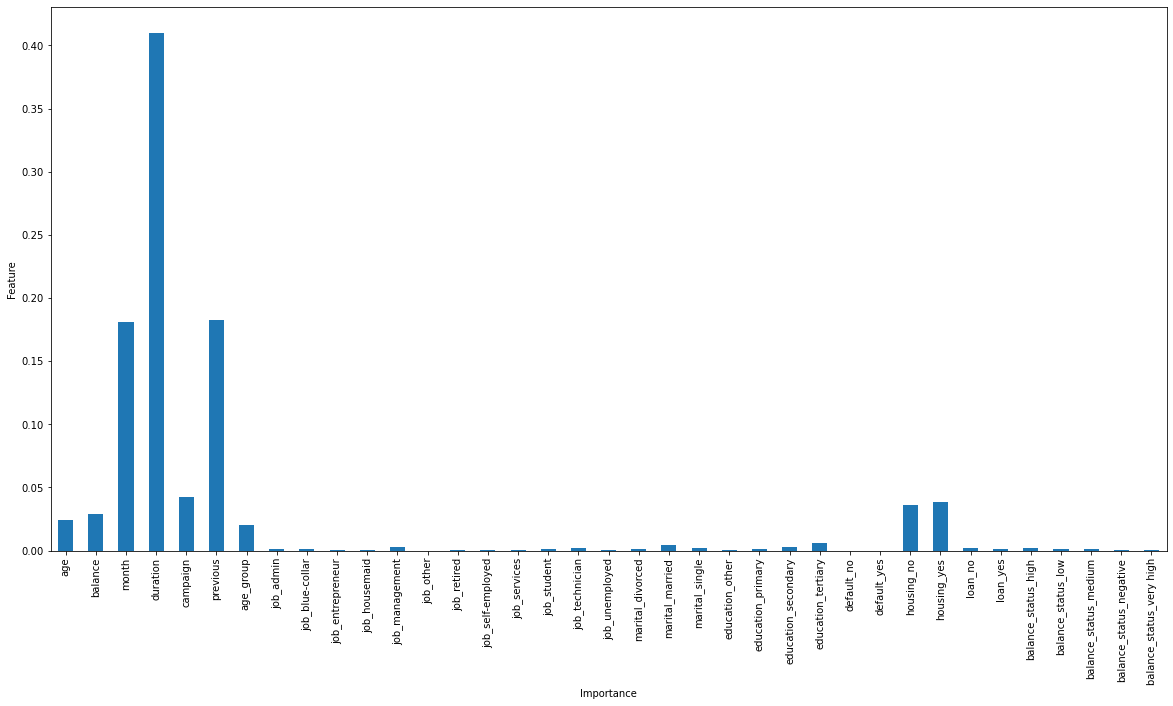

In [156]:
# get feature importances
importances = rf_smote.feature_importances_

# get the indices of the features sorted by importance
sorted_idx = importances.argsort()

# get the feature names and their importances
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)

# plot the feature importances
plt.figure(figsize=(20,10))
feature_importances.plot(kind='bar')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [158]:
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.model_selection import StratifiedKFold

In [173]:
# Select top K features using SelectFromModel
selector = SelectFromModel(rf_smote, threshold='0.5*mean', prefit=True)
X_train_new = selector.transform(X_train)
X_test_new = selector.transform(X_test)
print(f"Selected {X_train_new.shape[1]} features: {list(df1.columns[selector.get_support()])}")

Selected 9 features: ['age', 'balance', 'month', 'duration', 'campaign', 'previous', 'age_group', 'housing_no', 'housing_yes']


In [174]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with some hyperparameters
rf = RandomForestClassifier(n_estimators=90,oob_score=True,n_jobs=1,random_state=42,max_features=None,min_samples_leaf=10)

# Fit the classifier to the data
rf.fit(X_train, Y_train)

# Compute feature importances
importances = rf.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

age: 0.0893
balance: 0.0920
month: 0.1259
duration: 0.4290
campaign: 0.0237
previous: 0.0722
age_group: 0.0056
job_admin: 0.0032
job_blue-collar: 0.0041
job_entrepreneur: 0.0002
job_housemaid: 0.0004
job_management: 0.0067
job_other: 0.0001
job_retired: 0.0012
job_self-employed: 0.0005
job_services: 0.0011
job_student: 0.0045
job_technician: 0.0040
job_unemployed: 0.0008
marital_divorced: 0.0025
marital_married: 0.0092
marital_single: 0.0056
education_other: 0.0006
education_primary: 0.0025
education_secondary: 0.0075
education_tertiary: 0.0107
default_no: 0.0001
default_yes: 0.0001
housing_no: 0.0426
housing_yes: 0.0377
loan_no: 0.0028
loan_yes: 0.0025
balance_status_high: 0.0034
balance_status_low: 0.0030
balance_status_medium: 0.0034
balance_status_negative: 0.0004
balance_status_very high: 0.0005


In [175]:
a={}

In [176]:
for feature, importance in zip(X.columns, importances):
    a[feature]=importance

In [177]:
sorted_dict = dict(sorted(a.items(), key=lambda x: x[1], reverse=True))

In [178]:
# Print the sorted dictionary
for key, value in sorted_dict.items():
    print(key,":",round(value*100,2),"%")

duration : 42.9 %
month : 12.59 %
balance : 9.2 %
age : 8.93 %
previous : 7.22 %
housing_no : 4.26 %
housing_yes : 3.77 %
campaign : 2.37 %
education_tertiary : 1.07 %
marital_married : 0.92 %
education_secondary : 0.75 %
job_management : 0.67 %
age_group : 0.56 %
marital_single : 0.56 %
job_student : 0.45 %
job_blue-collar : 0.41 %
job_technician : 0.4 %
balance_status_high : 0.34 %
balance_status_medium : 0.34 %
job_admin : 0.32 %
balance_status_low : 0.3 %
loan_no : 0.28 %
marital_divorced : 0.25 %
loan_yes : 0.25 %
education_primary : 0.25 %
job_retired : 0.12 %
job_services : 0.11 %
job_unemployed : 0.08 %
education_other : 0.06 %
balance_status_very high : 0.05 %
job_self-employed : 0.05 %
job_housemaid : 0.04 %
balance_status_negative : 0.04 %
job_entrepreneur : 0.02 %
default_yes : 0.01 %
default_no : 0.01 %
job_other : 0.01 %


In [179]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Initialize PCA and fit the data
pca = PCA()
pca.fit(X_std)

# Compute the amount of variance explained by each principal component
variance = pca.explained_variance_ratio_

# Get the column names from the original dataframe
col_names = X.columns

# Create a new dataframe to store the results
pca_results = pd.DataFrame({'Column Name': col_names,
                            'Variance Explained': variance})

# Print the results
print(pca_results)

                 Column Name  Variance Explained
0                        age        8.688366e-02
1                    balance        7.397720e-02
2                      month        6.077358e-02
3                   duration        5.419849e-02
4                   campaign        5.065767e-02
5                   previous        4.648810e-02
6                  age_group        4.255536e-02
7                  job_admin        3.969819e-02
8            job_blue-collar        3.526154e-02
9           job_entrepreneur        3.382355e-02
10             job_housemaid        3.255514e-02
11            job_management        3.181377e-02
12                 job_other        3.104995e-02
13               job_retired        3.013037e-02
14         job_self-employed        2.895811e-02
15              job_services        2.846506e-02
16               job_student        2.825851e-02
17            job_technician        2.811265e-02
18            job_unemployed        2.762315e-02
19          marital_

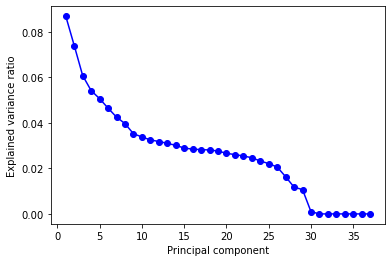

In [180]:
# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.show()

In [181]:
# Kaiser's Rule
# Find the number of principal components with eigenvalues > 1
n_components = len([eigval for eigval in pca.explained_variance_ if eigval > 1])

In [182]:
n_components

19

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Define the pipeline for the PCA and logistic regression model
pipe = Pipeline([('pca', PCA()),
                 ('clf', RandomForestClassifier())])

# Define the parameter grid to search over
param_grid = {'pca__n_components': range(1, X.shape[1]+1)}

# Define the cross-validation object
cv = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Fit the cross-validation object to the data
cv.fit(X_std, Y)

# Find the best number of principal components from the cross-validation results
n_components = cv.best_params_['pca__n_components']

In [17]:
n_components

14